In [1]:
!pip install pmdarima

     -------------------------------------- 602.3/602.3 KB 2.4 MB/s eta 0:00:00
     -------------------------------------- 983.8/983.8 KB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 4.6 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 KB 2.0 MB/s eta 0:00:00


You should consider upgrading via the 'C:\ProgramData\Anaconda3\envs\venai_1\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install stldecompose

You should consider upgrading via the 'C:\ProgramData\Anaconda3\envs\venai_1\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install statsmodels

You should consider upgrading via the 'C:\ProgramData\Anaconda3\envs\venai_1\python.exe -m pip install --upgrade pip' command.


# Part I) Import Library

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from numpy import sqrt
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Part II) Import Dataset

In [7]:
datas = pd.read_csv('avocado.csv')
datas = datas.iloc[:, 1:]
datas

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
datas['Date'] = datas['Date'].str[:-3]
datas

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Part III) Select Region

In [9]:
NY = datas.query('region == "NewYork"')
NY

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1456,2015-12,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork
1457,2015-12,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork
1458,2015-12,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork
1459,2015-12,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork
1460,2015-11,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17944,2018-02,1.83,93204.08,9300.64,21428.22,814.47,61660.75,61516.19,144.56,0.00,organic,2018,NewYork
17945,2018-01,1.75,96380.28,13196.30,24933.01,128.24,58122.73,56090.23,2032.50,0.00,organic,2018,NewYork
17946,2018-01,1.91,71760.69,5732.09,13124.59,157.72,52746.29,52130.98,615.31,0.00,organic,2018,NewYork
17947,2018-01,1.91,86632.25,7433.43,17885.26,49.43,61264.13,60763.71,500.42,0.00,organic,2018,NewYork


# Part IV) Select type

In [10]:
NY_con = NY.query('type == "conventional"')
NY_con

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1456,2015-12,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015,NewYork
1457,2015-12,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015,NewYork
1458,2015-12,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015,NewYork
1459,2015-12,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015,NewYork
1460,2015-11,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8821,2018-02,1.28,2959541.38,96084.63,2250967.25,3253.28,609236.22,569361.35,38734.78,1140.09,conventional,2018,NewYork
8822,2018-01,1.20,2278728.69,82652.82,1501055.47,745.50,694274.90,675215.26,18491.86,567.78,conventional,2018,NewYork
8823,2018-01,1.27,2135242.76,46444.43,1642533.16,1165.10,445100.07,423570.05,21523.99,6.03,conventional,2018,NewYork
8824,2018-01,1.67,1294149.71,39681.84,818051.50,1338.06,435078.31,415694.04,19384.27,0.00,conventional,2018,NewYork


In [11]:
NY_org = NY.query('type == "organic"')
NY_org

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10582,2015-12,1.90,21565.58,1752.06,6546.95,1319.02,11947.55,5757.79,6189.76,0.0,organic,2015,NewYork
10583,2015-12,1.93,24549.47,3571.41,11118.88,1760.45,8098.73,7057.10,1041.63,0.0,organic,2015,NewYork
10584,2015-12,1.90,23927.09,2764.18,6739.98,4130.01,10292.92,7553.74,2739.18,0.0,organic,2015,NewYork
10585,2015-12,1.65,18494.23,4117.08,7226.46,1106.58,6044.11,200.30,5843.81,0.0,organic,2015,NewYork
10586,2015-11,1.89,9962.63,1481.23,4689.04,807.44,2984.92,336.18,2648.74,0.0,organic,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17944,2018-02,1.83,93204.08,9300.64,21428.22,814.47,61660.75,61516.19,144.56,0.0,organic,2018,NewYork
17945,2018-01,1.75,96380.28,13196.30,24933.01,128.24,58122.73,56090.23,2032.50,0.0,organic,2018,NewYork
17946,2018-01,1.91,71760.69,5732.09,13124.59,157.72,52746.29,52130.98,615.31,0.0,organic,2018,NewYork
17947,2018-01,1.91,86632.25,7433.43,17885.26,49.43,61264.13,60763.71,500.42,0.0,organic,2018,NewYork


# Predict on NewYork conventional price

In [12]:
df_con_price = NY_con.iloc[:, :2]
df_con_price

,Date,AveragePrice
1456,2015-12,1.17
1457,2015-12,1.23
1458,2015-12,1.12
1459,2015-12,1.20
1460,2015-11,1.16
...,...,...
8821,2018-02,1.28
8822,2018-01,1.20
8823,2018-01,1.27
8824,2018-01,1.67


In [13]:
agg = {'AveragePrice':'mean'}
df_con_price = df_con_price.groupby(df_con_price['Date']).aggregate(agg).reset_index()
df_con_price

,Date,AveragePrice
0,2015-01,1.2900
1,2015-02,1.2900
2,2015-03,1.3360
3,2015-04,1.4250
4,2015-05,1.3540
5,2015-06,1.3200
6,2015-07,1.2750
7,2015-08,1.1400
8,2015-09,1.1800
9,2015-10,1.1850


In [14]:
df_con_price_bgin = df_con_price.copy()
df_con_price_bgin['Date'] = pd.to_datetime(df_con_price['Date'])
df_con_price_bgin

,Date,AveragePrice
0,2015-01-01,1.2900
1,2015-02-01,1.2900
2,2015-03-01,1.3360
3,2015-04-01,1.4250
4,2015-05-01,1.3540
5,2015-06-01,1.3200
6,2015-07-01,1.2750
7,2015-08-01,1.1400
8,2015-09-01,1.1800
9,2015-10-01,1.1850


In [15]:
df_con_price_bgin['AveragePrice'].mean()

1.4015384615384612

In [16]:
df_con_price = df_con_price_bgin.set_index('Date')

df_con_price

,AveragePrice
Date,
2015-01-01,1.2900
2015-02-01,1.2900
2015-03-01,1.3360
2015-04-01,1.4250
2015-05-01,1.3540
2015-06-01,1.3200
2015-07-01,1.2750
2015-08-01,1.1400
2015-09-01,1.1800


* Note for checking the Time-Series Data is Stationary or Seasonality:

      For Seasonary there will be:

          The p-value is obtained is greater than significance level of 0.05

          the ADF (Augmented Dickey Fuller) statistic is higher than any of the critical values.

* Officially: 

    ARIMA for Non-seasonality (Stationary)and Seasonality but technically ARIMA is that it does not support seasonal data

    SARIMA for Seasonality

* link:

    https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

In [17]:
from statsmodels.tsa.stattools import adfuller
adfuller = adfuller(df_con_price)
print("P-values of adfuller: ", adfuller[1])
print("ADF Statistic of adfuller: ", adfuller[0])
print("Critial Values of adfuller: ", adfuller[4])

P-values of adfuller:  0.21552286880799154
ADF Statistic of adfuller:  -2.174787973161991
Critial Values of adfuller:  {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}


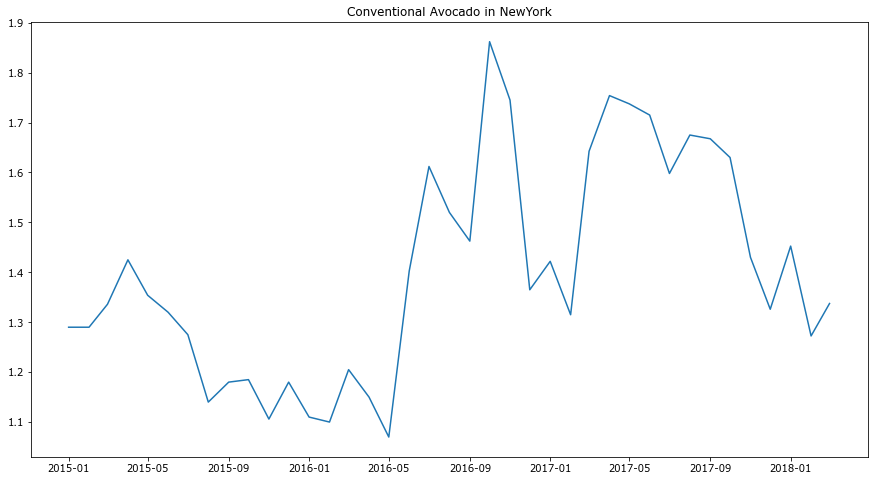

In [18]:
plt.figure(figsize=(15,8))
plt.plot(df_con_price)
plt.title("Conventional Avocado in NewYork")
plt.show()

<Figure size 1080x576 with 0 Axes>

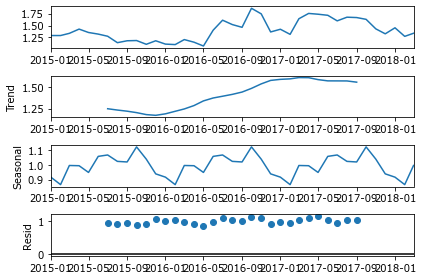

In [19]:
decompose_con_price = seasonal_decompose(df_con_price, model='multiplicative')

plt.figure(figsize=(15,8))
decompose_con_price.plot()


plt.show()

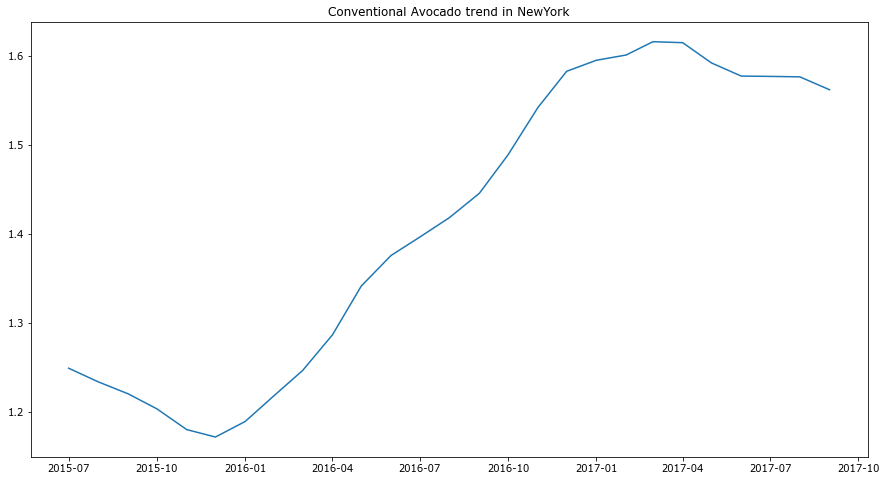

In [20]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.trend)
plt.title("Conventional Avocado trend in NewYork")
plt.show()

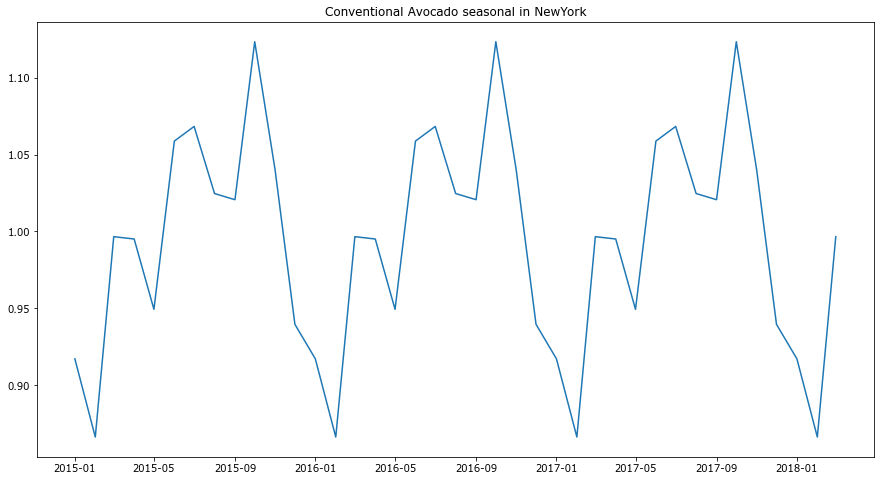

In [21]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.seasonal)
plt.title("Conventional Avocado seasonal in NewYork")
plt.show()

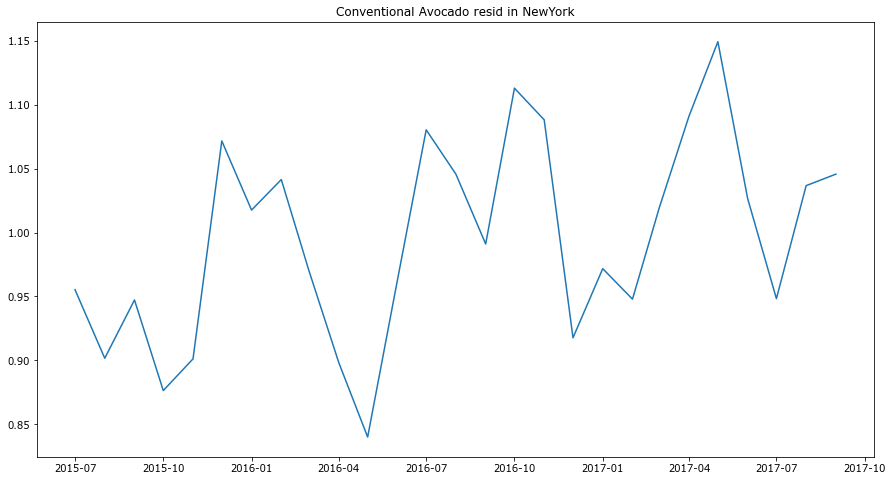

In [22]:
plt.figure(figsize=(15,8))
plt.plot(decompose_con_price.resid)
plt.title("Conventional Avocado resid in NewYork")
plt.show()

* Conclusion:

        In decompose we choose model='multiplicative' instead of model= 'additive' because it nonlinearity

        Non-linear trend

        Have Seasonal Component

        Residual from a little below 0.85 to 1.15


Remove trend

In [23]:
con_price_diff = df_con_price.diff()[1:]
con_price_diff

,AveragePrice
Date,
2015-02-01,0.0000
2015-03-01,0.0460
2015-04-01,0.0890
2015-05-01,-0.0710
2015-06-01,-0.0340
2015-07-01,-0.0450
2015-08-01,-0.1350
2015-09-01,0.0400
2015-10-01,0.0050


In [24]:
start_date = df_con_price_bgin.iloc[0, 0]
end_date = df_con_price_bgin.iloc[-1, 0]
print(start_date)
print(end_date)
s_y = start_date.year
e_y = end_date.year

2015-01-01 00:00:00
2018-03-01 00:00:00


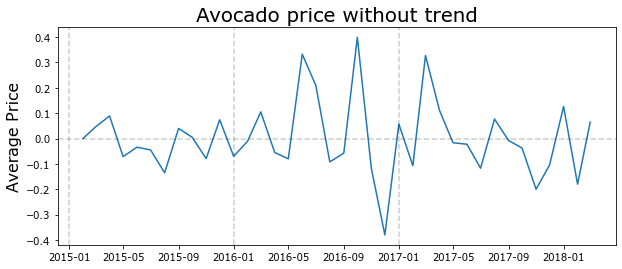

In [25]:

plt.figure(figsize=(10,4))
plt.plot(con_price_diff)
plt.title('Avocado price without trend', fontsize=20)
plt.ylabel('Average Price', fontsize=16)
for year in range(s_y,e_y):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

ACF

In [26]:
acf_vals = acf(con_price_diff)
acf_vals

array([ 1.        , -0.07384141, -0.28798452,  0.08388356, -0.0090952 ,
        0.00994422, -0.12407192,  0.05421739, -0.11037035,  0.05615694,
        0.11750661, -0.10067207,  0.07467517, -0.13854939, -0.02065234,
        0.13302827])

<BarContainer object of 16 artists>

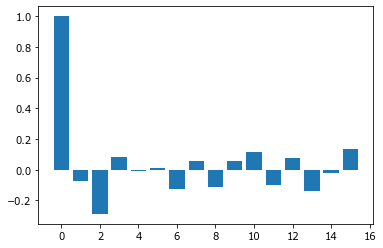

In [27]:
acf_vals = acf(con_price_diff)
num_lags = 16
plt.bar(range(num_lags), acf_vals[:num_lags])

In [28]:
acf_vals[:num_lags]

array([ 1.        , -0.07384141, -0.28798452,  0.08388356, -0.0090952 ,
        0.00994422, -0.12407192,  0.05421739, -0.11037035,  0.05615694,
        0.11750661, -0.10067207,  0.07467517, -0.13854939, -0.02065234,
        0.13302827])

In the 10th month and 15th month we have sinificanbehavior in the ACF plot

Base on ACF, we start the Seasonal MA process with the lag of 10 month

PACF

In [29]:
pacf_vals = pacf(con_price_diff)
pacf_vals[:num_lags]

array([ 1.        , -0.07583713, -0.3115266 ,  0.04145142, -0.10330666,
        0.04911894, -0.2044558 ,  0.08414594, -0.30011339,  0.18503952,
       -0.05868122,  0.04272718,  0.05299127, -0.26898062, -0.00450625,
        0.07919374])

<BarContainer object of 16 artists>

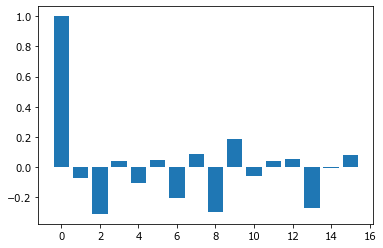

In [30]:
pacf_vals = pacf(con_price_diff)
num_lags = 16
plt.bar(range(num_lags), pacf_vals[:num_lags])

C:\ProgramData\Anaconda3\envs\venai_1\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


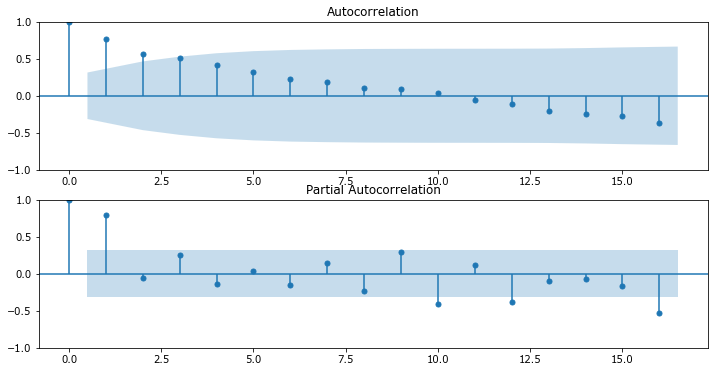

In [31]:
fig, ax = plt.subplots(2, figsize=(12, 6))

ax[0] = plot_acf(df_con_price, ax=ax[0], lags = 16)
ax[1] = plot_pacf(df_con_price, ax=ax[1], lags = 16)

In [32]:
X_train = df_con_price.query('Date <= "2017-06-01"')
X_test = df_con_price.query('Date >= "2017-06-01"')

In [33]:
X_train

,AveragePrice
Date,
2015-01-01,1.2900
2015-02-01,1.2900
2015-03-01,1.3360
2015-04-01,1.4250
2015-05-01,1.3540
2015-06-01,1.3200
2015-07-01,1.2750
2015-08-01,1.1400
2015-09-01,1.1800


In [34]:
X_test

,AveragePrice
Date,
2017-06-01,1.7150
2017-07-01,1.5980
2017-08-01,1.6750
2017-09-01,1.6675
2017-10-01,1.6300
2017-11-01,1.4300
2017-12-01,1.3260
2018-01-01,1.4525
2018-02-01,1.2725


In [35]:
from logging import warning
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

### Expland AR (Corelation with its past values) in ARIMA for the "p" parameter

Auto Regression : y(t+1) = b0 + b1*y(t-1) + b2*y(t-2)

p = order of AR; if p=3 mean X(t) is dependent on past 3 periods

p = PACF plot

PACF is a plo that shows the correlation of a series with lagged values

### Expland MA (Corelation between past error) in ARIMA for the "q" parameter

Moving Average: y(t) = b0 + E(t) + b1E(t-1) + b2E(t-2)

MA: y(t) depend on the error of the previous lagged values

MA: say that y(t) has the effect of previous error terms in it

q is the order of MA

q from ACF plot

### Expland I (difference by past value) in ARIMA for the "d" parameter

we different the data to remove trend and seasonality to make it stationary

d is order: how many time we difference the data

In [34]:
''' 
stepwise_model = auto_arima(X_train, 
                          start_p = 0,
                          start_q = 0,
                          max_p = 8,
                          max_q =8,
                          m = 12,
                          start_P = 0,
                          trace=True, 
                          suppress_warnings=True,
                          error_action='ignore',
                          stepwise=True)

stepwise_model.summary()
'''

" \nstepwise_model = auto_arima(X_train, \n                          start_p = 0,\n                          start_q = 0,\n                          max_p = 8,\n                          max_q =8,\n                          m = 12,\n                          start_P = 0,\n                          trace=True, \n                          suppress_warnings=True,\n                          error_action='ignore',\n                          stepwise=True)\n\nstepwise_model.summary()\n"

In [35]:
# import itertools

In [36]:
#p=range(0,8)
#q=range(0,8)
#d=range(0,2)

In [37]:
#pdq_combination = list(itertools.product(p, d, q))

In [38]:
#len(pdq_combination)

In [39]:
#pdq_combination

In [40]:
#rmse=[]
#order1=[]

In [41]:
'''
for pdq in pdq_combination:
  try:
        model = ARIMA(X_train, order=pdq).fit()
        pred = model.predict(start=len(X_train), end=(len(df_con_price)))
        error = np.sqrt(mean_squared_error(X_test, pred))
        order1.append(pdq)
        rmse.append(pdq)
        rmse.append(error)

  except:
       continue
'''

'\nfor pdq in pdq_combination:\n  try:\n        model = ARIMA(X_train, order=pdq).fit()\n        pred = model.predict(start=len(X_train), end=(len(df_con_price)))\n        error = np.sqrt(mean_squared_error(X_test, pred))\n        order1.append(pdq)\n        rmse.append(pdq)\n        rmse.append(error)\n\n  except:\n       continue\n'

In [42]:
#print(len(X_train))

In [43]:
#print(len(df_con_price) -1)

In [44]:
#rmse

In [45]:
#def Convert(lst):
#    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
#    return res_dct

In [46]:
#dict_rmse = Convert(rmse)
#dict_rmse

In [47]:

#min(dict_rmse.items(), key=lambda x: x[1]) 

In [48]:
#sorted(dict_rmse, key=dict_rmse.get, reverse=True)

In [49]:
#order1

In [50]:
#df_con_price.shape

In [51]:
#model = ARIMA(order=(0,1,0), endog)
#model = model.fit(X_train)


In [52]:
# sorted(dict_rmse, key=dict_rmse.get, reverse=True)

In [53]:
# model_test = ARIMA(X_train, order=(4, 0, 1)).fit()

In [54]:
# pred_test = model_test.predict(start=len(X_train), end=(len(df_con_price)))

In [55]:
# pred_test

In [36]:
import itertools

In [37]:
p=range(0,8)
q=range(0,8)
d=range(0,2)
P=range(0,8)
Q=range(0,8)
D=range(0,2)
M = range(10, 12)

In [38]:
M

range(10, 12)

In [ ]:
pdq_combination = list(itertools.product(p, d, q))
pdqM_combination = list(itertools.product(P, D, Q,M ))

In [ ]:
print(len(pdq_combination))
print(len(pdqM_combination))

In [41]:
pdqM_combination

[(0, 0, 0, 10),
 (0, 0, 0, 11),
 (0, 0, 1, 10),
 (0, 0, 1, 11),
 (0, 0, 2, 10),
 (0, 0, 2, 11),
 (0, 0, 3, 10),
 (0, 0, 3, 11),
 (0, 0, 4, 10),
 (0, 0, 4, 11),
 (0, 0, 5, 10),
 (0, 0, 5, 11),
 (0, 0, 6, 10),
 (0, 0, 6, 11),
 (0, 0, 7, 10),
 (0, 0, 7, 11),
 (0, 1, 0, 10),
 (0, 1, 0, 11),
 (0, 1, 1, 10),
 (0, 1, 1, 11),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (1, 0, 0, 10),
 (1, 0, 0, 11),
 (1, 0, 1, 10),
 (1, 0, 1, 11),
 (1, 0, 2, 10),
 (1, 0, 2, 11),
 (1, 0, 3, 10),
 (1, 0, 3, 11),
 (1, 0, 4, 10),
 (1, 0, 4, 11),
 (1, 0, 5, 10),
 (1, 0, 5, 11),
 (1, 0, 6, 10),
 (1, 0, 6, 11),
 (1, 0, 7, 10),
 (1, 0, 7, 11),
 (1, 1, 0, 10),
 (1, 1, 0, 11),
 (1, 1, 1, 10),
 (1, 1, 1, 11),
 (1, 1, 2, 10),
 (1, 1, 2, 11),
 (1, 1, 3, 10),
 (1, 1, 3, 11),
 (1, 1, 4, 10),
 (1, 1, 4, 11),
 (1, 1, 5, 10),
 (1, 1, 5, 11),
 (1, 1, 6, 10),
 (1, 1, 6, 11),
 (1, 1, 

In [42]:
rmse=[]
order1=[]
order2=[]

In [ ]:
for pdq in pdq_combination:
  for pdqm in pdqM_combination:
    try:
          model = SARIMAX(X_train, order=pdq, seasonal_order=pdqm).fit()
          pred = model.predict(start=len(X_train), end=(len(df_con_price)))
          error = np.sqrt(mean_squared_error(X_test, pred))
          order1.append(pdq)
          order2.append(pdqm)
          rmse.append(pdq)
          rmse.append(pdqm)
          rmse.append(error)

    except:
         continue


In [ ]:
print(len(df_con_price) -1)

38


In [ ]:
rmse

[(0, 0, 0),
 0.20673113664376216,
 (0, 0, 1),
 0.19614511719196126,
 (0, 0, 2),
 0.1817563579139082,
 (0, 0, 3),
 0.17711018448017612,
 (0, 0, 4),
 0.17518059575398648,
 (0, 0, 5),
 0.1438244392154043,
 (0, 0, 6),
 0.14691819574149964,
 (0, 0, 7),
 0.14639017534894286,
 (0, 1, 0),
 0.2577857637651855,
 (0, 1, 1),
 0.26012050129360204,
 (0, 1, 2),
 0.21995649985944538,
 (0, 1, 3),
 0.23033100880136123,
 (0, 1, 4),
 0.20450440006154413,
 (0, 1, 5),
 0.21232852682510178,
 (0, 1, 6),
 0.18232746618245943,
 (0, 1, 7),
 0.2168135956135657,
 (1, 0, 0),
 0.10852593600191596,
 (1, 0, 1),
 0.13237383924896726,
 (1, 0, 2),
 0.11859485015150267,
 (1, 0, 3),
 0.12577629974314505,
 (1, 0, 4),
 0.11998903972828356,
 (1, 0, 5),
 0.11623490622203499,
 (1, 0, 6),
 0.128297706225871,
 (1, 0, 7),
 0.12097599726921579,
 (1, 1, 0),
 0.25860482101355853,
 (1, 1, 1),
 0.20664392197803805,
 (1, 1, 2),
 0.23421370723687837,
 (1, 1, 3),
 0.22511136594285763,
 (1, 1, 4),
 0.22094451701188136,
 (1, 1, 5),
 0.20641

In [ ]:
def Convert(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [ ]:
dict_rmse = Convert(rmse)
dict_rmse

{(0, 0, 0): 0.20673113664376216,
 (0, 0, 1): 0.19614511719196126,
 (0, 0, 2): 0.1817563579139082,
 (0, 0, 3): 0.17711018448017612,
 (0, 0, 4): 0.17518059575398648,
 (0, 0, 5): 0.1438244392154043,
 (0, 0, 6): 0.14691819574149964,
 (0, 0, 7): 0.14639017534894286,
 (0, 1, 0): 0.2577857637651855,
 (0, 1, 1): 0.26012050129360204,
 (0, 1, 2): 0.21995649985944538,
 (0, 1, 3): 0.23033100880136123,
 (0, 1, 4): 0.20450440006154413,
 (0, 1, 5): 0.21232852682510178,
 (0, 1, 6): 0.18232746618245943,
 (0, 1, 7): 0.2168135956135657,
 (1, 0, 0): 0.10852593600191596,
 (1, 0, 1): 0.13237383924896726,
 (1, 0, 2): 0.11859485015150267,
 (1, 0, 3): 0.12577629974314505,
 (1, 0, 4): 0.11998903972828356,
 (1, 0, 5): 0.11623490622203499,
 (1, 0, 6): 0.128297706225871,
 (1, 0, 7): 0.12097599726921579,
 (1, 1, 0): 0.25860482101355853,
 (1, 1, 1): 0.20664392197803805,
 (1, 1, 2): 0.23421370723687837,
 (1, 1, 3): 0.22511136594285763,
 (1, 1, 4): 0.22094451701188136,
 (1, 1, 5): 0.20641605534610327,
 (1, 1, 6): 0.17

In [ ]:

min(dict_rmse.items(), key=lambda x: x[1]) 

((3, 0, 5), 0.08742772360998476)

In [ ]:
sorted(dict_rmse, key=dict_rmse.get, reverse=True)

[(7, 1, 7),
 (6, 1, 7),
 (6, 1, 5),
 (4, 1, 7),
 (3, 1, 0),
 (2, 1, 0),
 (2, 1, 7),
 (5, 1, 7),
 (2, 1, 1),
 (3, 1, 7),
 (0, 1, 1),
 (1, 1, 0),
 (0, 1, 0),
 (6, 1, 3),
 (3, 1, 1),
 (1, 1, 7),
 (6, 1, 4),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 3),
 (4, 1, 0),
 (5, 1, 6),
 (5, 1, 0),
 (5, 1, 3),
 (1, 1, 2),
 (5, 1, 5),
 (0, 1, 3),
 (3, 1, 4),
 (1, 1, 3),
 (3, 1, 5),
 (1, 1, 4),
 (0, 1, 2),
 (6, 1, 6),
 (5, 1, 1),
 (2, 1, 5),
 (4, 1, 1),
 (0, 1, 7),
 (3, 1, 6),
 (4, 1, 6),
 (2, 1, 3),
 (2, 1, 2),
 (3, 1, 2),
 (0, 1, 5),
 (6, 1, 1),
 (7, 1, 1),
 (7, 1, 0),
 (6, 1, 0),
 (2, 1, 6),
 (0, 0, 0),
 (1, 1, 1),
 (1, 1, 5),
 (6, 1, 2),
 (0, 1, 4),
 (3, 1, 3),
 (5, 1, 4),
 (2, 1, 4),
 (0, 0, 1),
 (7, 1, 6),
 (4, 1, 3),
 (7, 1, 2),
 (6, 0, 5),
 (0, 1, 6),
 (0, 0, 2),
 (7, 0, 4),
 (7, 0, 3),
 (0, 0, 3),
 (7, 0, 7),
 (0, 0, 4),
 (4, 1, 4),
 (1, 1, 6),
 (4, 1, 5),
 (5, 1, 2),
 (4, 0, 4),
 (7, 0, 5),
 (6, 0, 6),
 (7, 0, 6),
 (4, 0, 3),
 (5, 0, 7),
 (2, 0, 7),
 (4, 1, 2),
 (6, 0, 7),
 (5, 0, 6),
 (0, 0, 6),
 (0,

In [ ]:
order1

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [ ]:
df_con_price.shape

(39, 1)

In [ ]:
stepwise_model.fit(X_train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
model = SARIMAX(X_train, order= (0,1,0), seasonal_order=(0, 0, 0, 12)).fit()
pred_te = model.predict(start=len(X_train), end=(len(df_con_price)))
pred_te

2017-07-01    1.715
2017-08-01    1.715
2017-09-01    1.715
2017-10-01    1.715
2017-11-01    1.715
2017-12-01    1.715
2018-01-01    1.715
2018-02-01    1.715
2018-03-01    1.715
2018-04-01    1.715
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(X_test, pred))

array([1.715, 1.715, 1.715, 1.715, 1.715, 1.715, 1.715, 1.715, 1.715,
       1.715])

,AveragePrice
Date,
2017-06-01,1.7150
2017-07-01,1.5980
2017-08-01,1.6750
2017-09-01,1.6675
2017-10-01,1.6300
2017-11-01,1.4300
2017-12-01,1.3260
2018-01-01,1.4525
2018-02-01,1.2725


In [ ]:
#rmse = sqrt(mean_squared_error(X_test, future_forecast))
#rmse

In [ ]:
#mae = mean_absolute_error(X_test, future_forecast)
#mae

In [ ]:
#mape = mean_absolute_percentage_error(X_test, future_forecast)
#mape

NameError: ignored

In [ ]:
#rmse_1 = sqrt(mean_squared_error(X_test, future_forecast_1))
rmse_1 = sqrt(mean_squared_error(X_test, pred_test))
rmse_1

0.11275267787067883

In [ ]:
#mae_1 = mean_absolute_error(X_test, future_forecast_1)
mae_1 = mean_absolute_error(X_test, pred_test)
mae_1

0.0980902505615163

In [ ]:
#mape_1 = mean_absolute_percentage_error(X_test, future_forecast_1)
mape_1 = mean_absolute_percentage_error(X_test, pred_test)
mape_1

0.0663084560406721

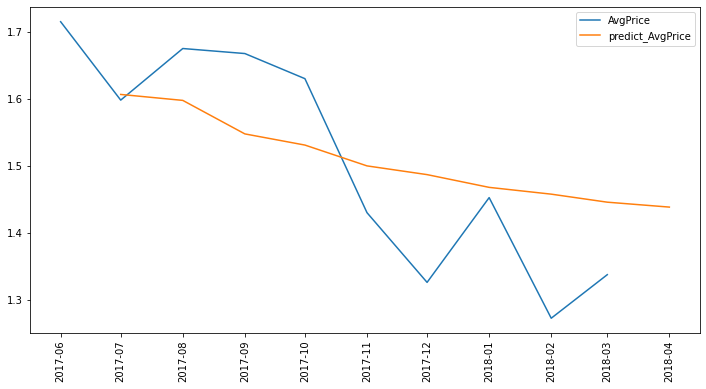

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(X_test, label="AvgPrice")
plt.plot(pred_test, label="predict_AvgPrice")
#plt.plot(future_forecast_1, label="predict_AvgPrice")
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Predict on NewYork conventional price

In [ ]:
df_con_price = NY_con.iloc[:, 1:2]

In [ ]:
df_con_price.index = df_con_price.index.to_period('Y')

In [ ]:
df_con_price

,AveragePrice
Date,
2015,1.17
2015,1.23
2015,1.12
2015,1.20
2015,1.16
...,...
2017,1.52
2017,1.48
2017,1.38


In [ ]:
X = df_con_price.values
X
X.shape

(157, 1)

In [ ]:
size = int(len(X)*0.75)
size

117

In [ ]:
X_train, X_test = X[0:size], X[size:len(X)]

In [ ]:
X_train

array([[1.17],
       [1.23],
       [1.12],
       [1.2 ],
       [1.16],
       [1.14],
       [1.04],
       [1.13],
       [1.06],
       [1.23],
       [0.97],
       [1.28],
       [1.26],
       [1.16],
       [1.18],
       [1.16],
       [1.22],
       [1.22],
       [1.1 ],
       [1.14],
       [1.1 ],
       [1.14],
       [1.28],
       [1.37],
       [1.27],
       [1.18],
       [1.36],
       [1.28],
       [1.32],
       [1.32],
       [1.43],
       [1.37],
       [1.43],
       [1.22],
       [1.32],
       [1.44],
       [1.42],
       [1.43],
       [1.41],
       [1.36],
       [1.33],
       [1.45],
       [1.36],
       [1.18],
       [1.33],
       [1.36],
       [1.11],
       [1.36],
       [1.36],
       [1.37],
       [1.34],
       [1.09],
       [1.36],
       [1.26],
       [1.32],
       [1.52],
       [1.56],
       [1.59],
       [1.9 ],
       [1.93],
       [1.99],
       [1.95],
       [1.89],
       [1.76],
       [1.72],
       [1.62],
       [1.

In [ ]:
X_test

array([[1.67],
       [1.65],
       [1.61],
       [1.61],
       [1.8 ],
       [1.81],
       [1.75],
       [1.58],
       [1.56],
       [1.52],
       [1.55],
       [1.57],
       [1.63],
       [1.72],
       [1.47],
       [1.82],
       [1.74],
       [1.83],
       [1.75],
       [1.8 ],
       [1.75],
       [1.65],
       [1.84],
       [1.68],
       [1.76],
       [1.75],
       [1.74],
       [1.72],
       [1.7 ],
       [1.76],
       [1.39],
       [1.55],
       [1.28],
       [1.19],
       [1.24],
       [1.52],
       [1.48],
       [1.38],
       [1.29],
       [1.44]])

In [ ]:
history = [x for x in X_train]
history

[array([1.17]),
 array([1.23]),
 array([1.12]),
 array([1.2]),
 array([1.16]),
 array([1.14]),
 array([1.04]),
 array([1.13]),
 array([1.06]),
 array([1.23]),
 array([0.97]),
 array([1.28]),
 array([1.26]),
 array([1.16]),
 array([1.18]),
 array([1.16]),
 array([1.22]),
 array([1.22]),
 array([1.1]),
 array([1.14]),
 array([1.1]),
 array([1.14]),
 array([1.28]),
 array([1.37]),
 array([1.27]),
 array([1.18]),
 array([1.36]),
 array([1.28]),
 array([1.32]),
 array([1.32]),
 array([1.43]),
 array([1.37]),
 array([1.43]),
 array([1.22]),
 array([1.32]),
 array([1.44]),
 array([1.42]),
 array([1.43]),
 array([1.41]),
 array([1.36]),
 array([1.33]),
 array([1.45]),
 array([1.36]),
 array([1.18]),
 array([1.33]),
 array([1.36]),
 array([1.11]),
 array([1.36]),
 array([1.36]),
 array([1.37]),
 array([1.34]),
 array([1.09]),
 array([1.36]),
 array([1.26]),
 array([1.32]),
 array([1.52]),
 array([1.56]),
 array([1.59]),
 array([1.9]),
 array([1.93]),
 array([1.99]),
 array([1.95]),
 array([1.89

[1.68178778 1.68987    1.70189824 1.70038687 1.69924397 1.7009488
 1.70181687 1.70136736 1.70134768 1.70158998 1.70161341 1.70154898
 1.70156734 1.70159342 1.70158704 1.70158096 1.7015854  1.70158732
 1.70158579 1.70158553 1.7015862  1.70158622 1.70158601 1.70158605
 1.70158613 1.7015861  1.70158608 1.7015861  1.7015861  1.7015861
 1.70158609 1.7015861  1.7015861  1.7015861  1.7015861  1.7015861
 1.7015861  1.7015861  1.7015861  1.7015861 ]


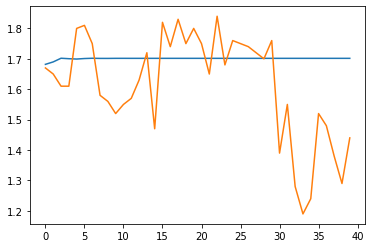

In [ ]:
start = len(X_train)
end = len(X_train) + len(X_test) -1
pred = model.predict(start=start, end=end, typ='levels')
print(pred)
plt.plot(pred)
plt.plot(X_test)

In [ ]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(pred, X_test))
print (rmse)

0.19269887173018085


In [ ]:
from datetime import datetime

In [ ]:
start = len(X_train)
end = len(X_train) + len(X_test) -1

start

117

In [ ]:
pred = model.predict(start=start, end=end, typ='levels')
print(pred)

[1.72593681 1.69109443 1.75101087 1.71630357 1.75493923 1.72726329
 1.76501916 1.7394377  1.77092058 1.75131059 1.77842648 1.76237755
 1.78573151 1.7734389  1.79341463 1.78407489 1.80135302 1.79452674
 1.80949998 1.80475159 1.81784899 1.81480587 1.82635232 1.82471386
 1.83499087 1.83450052 1.84373833 1.84418808 1.85257618 1.85379374
 1.86148796 1.86333258 1.87046024 1.87281666 1.87948201 1.88225603
 1.88854419 1.89165887 1.89763937 1.90103191]


0.17807624275045858


In [ ]:
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit()


In [ ]:
output = model_fit.forecast()
output

array([1.38586061])

In [ ]:
yhat = output[0]
yhat

1.3858606058468503

In [ ]:
predictions = [yhat]
predictions

[1.3858606058468503]

In [ ]:
obs = X_test[]

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           AveragePrice   No. Observations:                  157
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  94.693
Date:                Tue, 10 May 2022   AIC                           -177.385
Time:                        06:44:06   BIC                           -159.086
Sample:                             0   HQIC                          -169.953
                                - 157                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4414      0.080     -5.489      0.000      -0.599      -0.284
ar.L2         -0.1162      0.101     -1.156      0.248      -0.313       0.081
ar.L3         -0.0235      0.072     -0.326      0.7

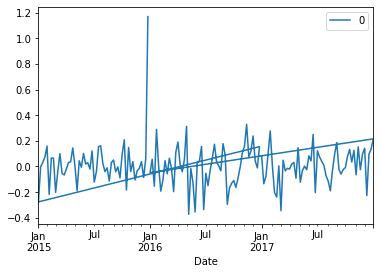

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

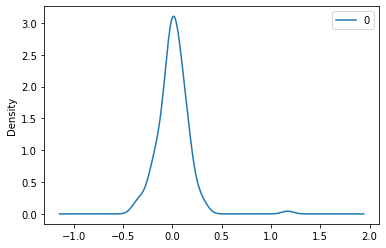

In [ ]:
residuals.plot(kind='kde')
plt.show()

In [ ]:
print(residuals.describe())

                0
count  157.000000
mean     0.009551
std      0.161411
min     -0.373758
25%     -0.059795
50%      0.005730
75%      0.091215
max      1.170000


In [ ]:
forecast_con_price

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.250760,158.5,0.873143,1.313119,1.250760,1.250760,-0.162908,-0.162908,-0.162908,-0.162908,-0.162908,-0.162908,0.0,0.0,0.0,1.087852
1,2015-01-11,1.251169,158.5,0.956738,1.390580,1.251169,1.251169,-0.080192,-0.080192,-0.080192,-0.080192,-0.080192,-0.080192,0.0,0.0,0.0,1.170977
2,2015-01-18,1.251577,158.5,1.010380,1.459244,1.251577,1.251577,-0.020795,-0.020795,-0.020795,-0.020795,-0.020795,-0.020795,0.0,0.0,0.0,1.230782
3,2015-01-25,1.251986,158.5,1.005085,1.444762,1.251986,1.251986,-0.033595,-0.033595,-0.033595,-0.033595,-0.033595,-0.033595,0.0,0.0,0.0,1.218391
4,2015-02-01,1.252395,158.5,0.915214,1.362094,1.252395,1.252395,-0.105180,-0.105180,-0.105180,-0.105180,-0.105180,-0.105180,0.0,0.0,0.0,1.147214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2018-12-02,1.863488,158.5,1.489125,1.940177,1.839033,1.887143,-0.144200,-0.144200,-0.144200,-0.144200,-0.144200,-0.144200,0.0,0.0,0.0,1.719288
205,2018-12-09,1.867783,158.5,1.476030,1.929154,1.842684,1.892076,-0.169388,-0.169388,-0.169388,-0.169388,-0.169388,-0.169388,0.0,0.0,0.0,1.698395
206,2018-12-16,1.872087,158.5,1.471977,1.911102,1.846095,1.897165,-0.192684,-0.192684,-0.192684,-0.192684,-0.192684,-0.192684,0.0,0.0,0.0,1.679404
207,2018-12-23,1.876401,158.5,1.436409,1.896292,1.849357,1.902609,-0.213374,-0.213374,-0.213374,-0.213374,-0.213374,-0.213374,0.0,0.0,0.0,1.663027


In [ ]:
forecast_con_price[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2018-12-02,1.719288,1.489125,1.940177
205,2018-12-09,1.698395,1.476030,1.929154
206,2018-12-16,1.679404,1.471977,1.911102
207,2018-12-23,1.663027,1.436409,1.896292
208,2018-12-30,1.678263,1.436273,1.916154


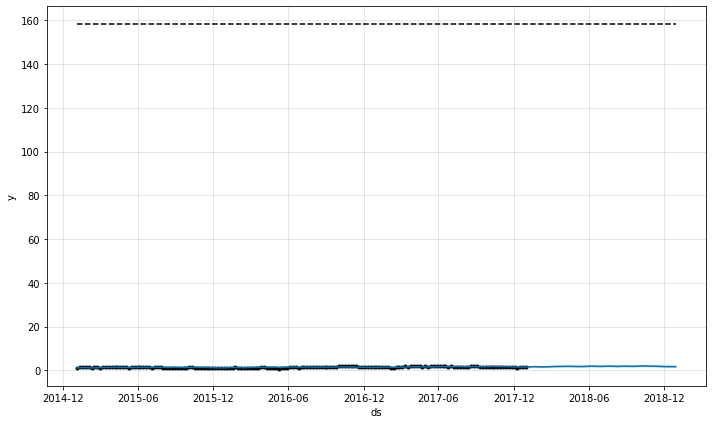

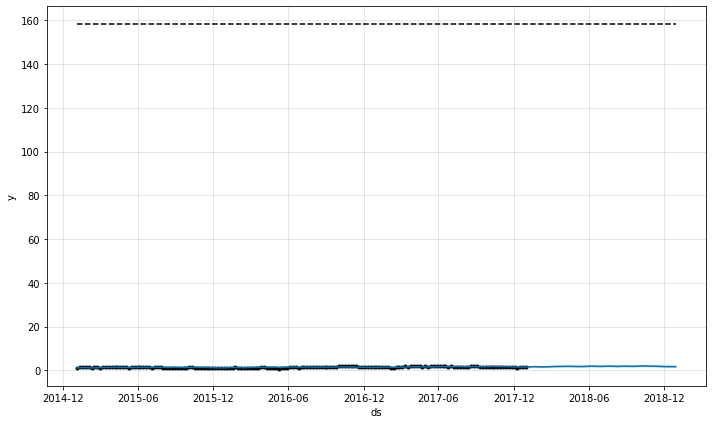

In [ ]:
model_con_price.plot(forecast_con_price)

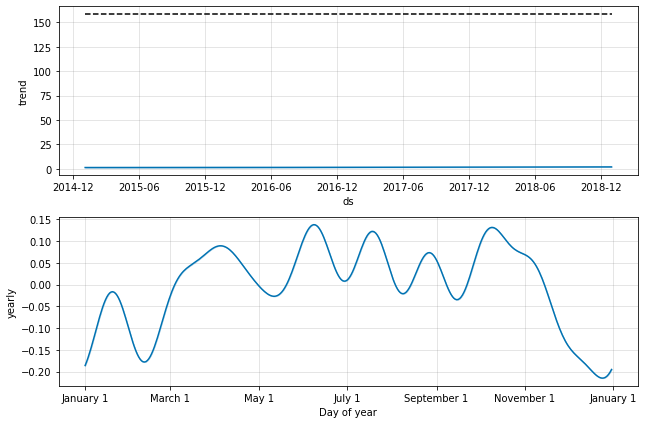

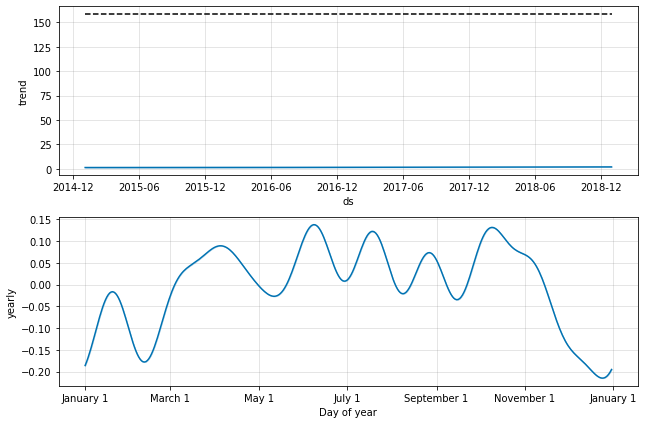

In [ ]:
model_con_price.plot_components(forecast_con_price)

# Evaluate Model

In [ ]:
NY_test = datas.query('region == "NewYork"')
NY_test = NY_test.query('year == 2018')
NY_test

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8814,0,2018-03-25,1.34,1774776.77,63905.98,908653.71,843.45,801373.63,774634.09,23833.93,2905.61,conventional,2018,NewYork
8815,1,2018-03-18,1.43,1564859.63,73760.49,911098.28,612.78,579388.08,552433.16,24302.69,2652.23,conventional,2018,NewYork
8816,2,2018-03-11,1.35,1755052.38,64008.06,883441.96,828.96,806773.40,730150.78,74224.85,2397.77,conventional,2018,NewYork
8817,3,2018-03-04,1.23,1931495.66,62328.70,1324579.73,754.74,543832.49,511679.31,29854.29,2298.89,conventional,2018,NewYork
8818,4,2018-02-25,1.30,1615325.14,76602.52,841320.18,852.11,696550.33,632625.27,61658.39,2266.67,conventional,2018,NewYork
8819,5,2018-02-18,1.24,1413687.38,87283.86,909950.56,885.94,415567.02,392965.43,20809.09,1792.50,conventional,2018,NewYork
8820,6,2018-02-11,1.27,2051389.99,169218.18,1319012.42,1222.29,561937.10,539237.71,21409.81,1289.58,conventional,2018,NewYork
8821,7,2018-02-04,1.28,2959541.38,96084.63,2250967.25,3253.28,609236.22,569361.35,38734.78,1140.09,conventional,2018,NewYork
8822,8,2018-01-28,1.20,2278728.69,82652.82,1501055.47,745.50,694274.90,675215.26,18491.86,567.78,conventional,2018,NewYork
8823,9,2018-01-21,1.27,2135242.76,46444.43,1642533.16,1165.10,445100.07,423570.05,21523.99,6.03,conventional,2018,NewYork


In [ ]:
test_yhat_con_price = forecast_con_price[['ds', 'yhat']]
test_yhat_con_price = test_yhat_con_price.query('"2018-01-07" <= ds <= "2018-03-25"')
pd.options.display.float_format = "{:,.2f}".format
test_yhat_con_price

,ds,yhat
157,2018-01-07,1.55
158,2018-01-14,1.63
159,2018-01-21,1.66
160,2018-01-28,1.62
161,2018-02-04,1.55
162,2018-02-11,1.51
163,2018-02-18,1.55
164,2018-02-25,1.63
165,2018-03-04,1.70
166,2018-03-11,1.74


In [ ]:
test_yhat_con_price = forecast_con_price.query('"2018-01-07" <= ds <= "2018-03-25"')
test_yhat_con_price = test_yhat_con_price[['yhat']]
pd.options.display.float_format = "{:,.2f}".format
test_yhat_con_price

,yhat
157,1.55
158,1.63
159,1.66
160,1.62
161,1.55
162,1.51
163,1.55
164,1.63
165,1.70
166,1.74


In [ ]:
test_con_price = NY_test.query('type == "conventional"')
test_con_price = test_con_price[["AveragePrice"]]
test_con_price

,AveragePrice
8814,1.34
8815,1.43
8816,1.35
8817,1.23
8818,1.30
8819,1.24
8820,1.27
8821,1.28
8822,1.20
8823,1.27


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_con_price, test_yhat_con_price)

0.09728052995855513

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_con_price, test_yhat_con_price, squared=False)

0.31189826860461267

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_con_price, test_yhat_con_price)

0.2869915627428208